## We know that the Loss Function for Logistic Regression is:

$$
L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)}) =
\begin{cases}
-\log(f_{\vec{w}, b}(\vec{x}^{(i)})) & \text{if } y^{(i)} = 1 \\
-\log(1 - f_{\vec{w}, b}(\vec{x}^{(i)})) & \text{if } y^{(i)} = 0
\end{cases}
$$

Where, 


$$
f_{\vec{w}, b}(\vec{x}) = \frac{1}{1 + e^{-(w \cdot x + b)}}
$$

### Now, let us simplying this loss function so that impementation is simpler when using gradient descent.

$ L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)}) = -y^{(i)} log(f_{\vec{w}, b}(\vec{x}^{(i)}))- (1-y^{(i)}) log(1-f_{\vec{w}, b}(\vec{x}^{(i)})) $






if $y^{(i)}=1$:


$L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)}) = -1 \cdot log(f_{\vec w,b}{(\vec x^{(i)})})$

if $y^{(i)}=0$:

$L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)}) = -(1-0) \cdot log(1-f_{\vec w,b}{(\vec x^{(i)})})$


# Simplified Cost Function

$J(\vec w, b) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} log(f_{\vec{w}, b}(\vec{x}^{(i)})) + (1-y^{(i)}) log(1-f_{\vec{w}, b}(\vec{x}^{(i)}))]$

## Lab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Dataset



In [21]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])  

In [22]:
x0 = X_train[:, 0]
x1 = X_train[:,1]

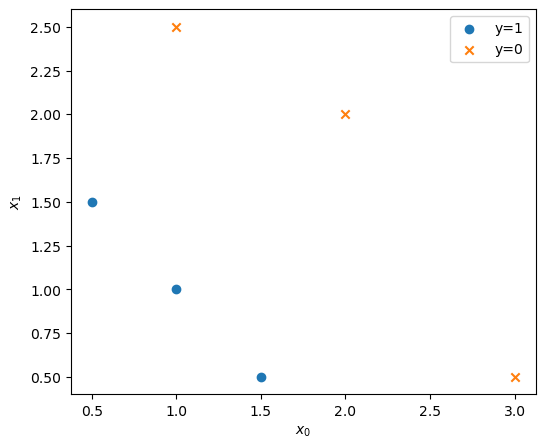

In [23]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(x0[:3], x1[:3], marker='o', label="y=1")
ax.scatter(x0[3::], x1[3:], marker='x', label="y=0")

ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")

ax.legend()

In [37]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))

    return g

In [29]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost for gradient descent

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost

    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)

        cost += -y[i] * np.log(f_wb_i) - (1-y[i]) * np.log(1-f_wb_i)

    cost = cost/m
    return cost
        

In [30]:
w_temp = np.array([1,1])
b_temp = -3

compute_cost_logistic(X_train, y_train, w_temp, b_temp)

0.36686678640551745

For the given value of w and b, lets plot the decision boundary:

$x_0 + x_1 -3 = 0$

so, 

$x_1 = 3-x_0$

Consider a new value for w and b, 


$b = -4$ and $w_0 = 1$ and $w_1=1$,

so $x_1=4-x_0$

In [33]:
x0p = np.arange(0,6)
x1p = 3 - x0p

x2p = 4 - x0p

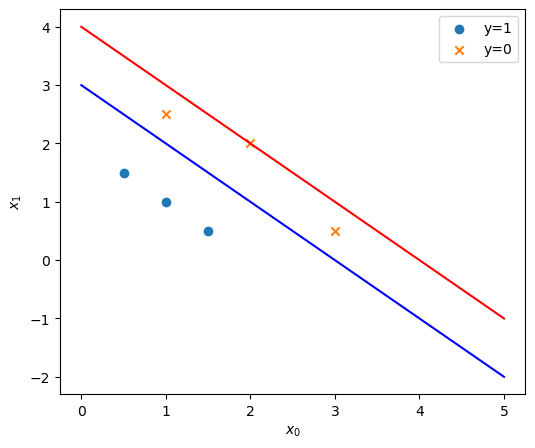

In [35]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(x0[:3], x1[:3], marker='o', label="y=1")
ax.scatter(x0[3::], x1[3:], marker='x', label="y=0")

ax.plot(x0p, x1p, c='b')
ax.plot(x0p, x2p, c='r')

ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")

ax.legend()

As we can see that, $b = -4$ and $w_0 = 1$ and $w_1=1$, is not a good model.

Let us verify this with cost function:

In [36]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461




We can see the cost function behaves as expected and the cost for `b = -4, w = np.array([1,1])` is indeed higher than the cost for `b = -3, w = np.array([1,1])`